<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
movies["duration"].describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values("duration").head(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [7]:
movies.sort_values("duration").tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

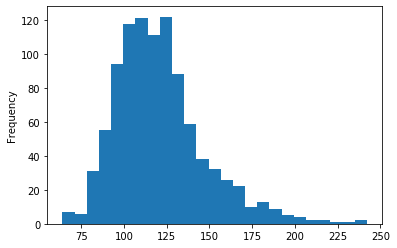

In [8]:
# Answer:
movies["duration"].plot.hist(bins=25)

#### Use a box plot to display that same data.

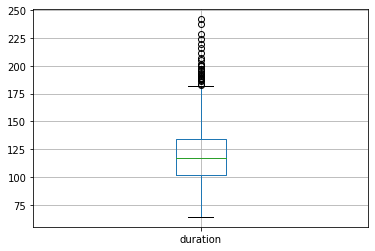

In [9]:
# Answer:
movies.boxplot("duration")

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.groupby(by = "content_rating").count()

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


#### Use a visualization to display that same data, including a title and x and y labels.

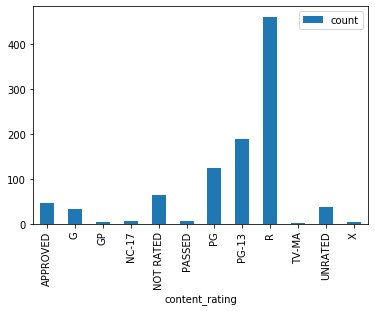

In [12]:
# Answer:
temp = movies.groupby(by = "content_rating").count()

temp.drop(["title","genre","duration","actors_list"],axis=1, inplace= True)
temp.reset_index(inplace = True)
temp.rename(columns = {"star_rating": "count"},inplace = True)
temp.plot.bar("content_rating")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [38]:
# Answer
movies["content_rating"].replace("UNRATED", "NOT RATED, APPROVED, PASSED, GP",inplace=True)
movies.groupby(by = "content_rating").count()




,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NC-17,7,7,7,7,7
NOT RATED,65,65,65,65,65
"NOT RATED, APPROVED, PASSED, GP",38,38,38,38,38
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [45]:
# Answer:
movies.content_rating.replace("NC-17", "X,TV-MA", inplace = True)
movies.groupby(by = "content_rating").count()

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NOT RATED,65,65,65,65,65
"NOT RATED, APPROVED, PASSED, GP",38,38,38,38,38
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


#### Count the number of missing values in each column.

In [56]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [66]:
# Answer:
movies.content_rating.fillna("unknown", inplace = True)
movies.groupby(by = "content_rating").count()

,star_rating,title,genre,duration,actors_list
content_rating,,,,,
APPROVED,47,47,47,47,47
G,32,32,32,32,32
GP,3,3,3,3,3
NOT RATED,65,65,65,65,65
"NOT RATED, APPROVED, PASSED, GP",38,38,38,38,38
PASSED,7,7,7,7,7
PG,123,123,123,123,123
PG-13,189,189,189,189,189
R,460,460,460,460,460


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [79]:
# Answer:
movies[movies.duration >= 120].star_rating.mean()


7.948898678414082

In [78]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

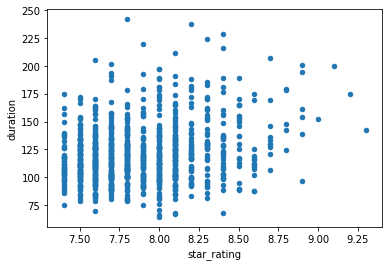

In [82]:
# Answer:
movies.plot.scatter("star_rating", "duration")

#### Calculate the average duration for each genre.

In [92]:
# Answer:
movies.groupby(by = "genre").duration.mean().sort_values()


genre
History       66.000000
Animation     96.596774
Film-Noir     97.333333
Horror       102.517241
Family       107.500000
Comedy       107.602564
Sci-Fi       109.000000
Fantasy      112.000000
Thriller     114.200000
Mystery      115.625000
Crime        122.298387
Action       126.485294
Drama        126.539568
Biography    131.844156
Adventure    134.840000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

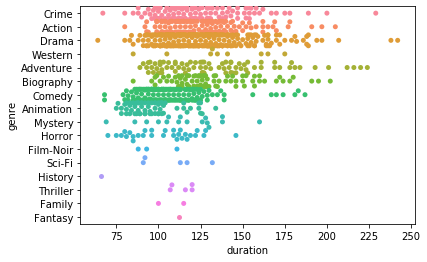

In [106]:
# Answer:
import seaborn as sns
sns.swarmplot(movies.duration, movies.genre)


#### Determine the top rated movie (by star rating) for each genre.

In [134]:
# Answer:
movies.groupby(by = "genre").max().title

genre
Action                                   Yojimbo
Adventure                              True Grit
Animation                         Wreck-It Ralph
Biography                          Walk the Line
Comedy                                Zombieland
Crime                                     Zodiac
Drama                                       Zulu
Family       Willy Wonka & the Chocolate Factory
Fantasy                The City of Lost Children
Film-Noir                          The Third Man
History                      Battleship Potemkin
Horror                                     [Rec]
Mystery                                  Vertigo
Sci-Fi             The Day the Earth Stood Still
Thriller               The Man Who Knew Too Much
Western                               Unforgiven
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [138]:
# Answer:
movies[movies.title.duplicated()]


,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,unknown,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [140]:
movies[movies.title=="True Grit"]

,star_rating,title,content_rating,genre,duration,actors_list
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,unknown,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [141]:
movies[movies.title=="The Girl with the Dragon Tattoo"]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."


In [142]:
movies[movies.duplicated()]  #verifying

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [171]:
# Answer:

x = movies.groupby(by = "genre").count().reset_index()
y= x[x.title>=10]["genre"]

movies[movies.genre.isin(y)].groupby(by = "genre").mean()


,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Horror,7.806897,102.517241
Mystery,7.975000,115.625000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [158]:
# Answer:
movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [205]:
actors = movies["actors_list"]

In [212]:
dict1 = {}

for groups in actors:
    if groups in dict1:
        dict1[groups] += 1
    else:
        dict1[groups] = 1
    


In [214]:
sorted(dict1.items(),key = lambda kv:kv[1],reverse = True)

[("[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']", 6),
 ("[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']", 3),
 ("[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']", 2),
 ("[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']", 2),
 ("[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']", 2),
 ("[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']", 1),
 ("[u'Marlon Brando', u'Al Pacino', u'James Caan']", 1),
 ("[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']", 1),
 ("[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']", 1),
 ("[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']", 1),
 ("[u'Henry Fonda', u'Lee J. Cobb', u'Martin Balsam']", 1),
 ("[u'Clint Eastwood', u'Eli Wallach', u'Lee Van Cleef']", 1),
 ("[u'Elijah Wood', u'Viggo Mortensen', u'Ian McKellen']", 1),
 ("[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kingsley']", 1),
 ("[u'Brad Pitt', u'Edward Norton', u'Helena Bonham Carter']", 1),
 ("[u'Elijah Wood', u'Ian McKellen', u'Orlando Bloom']", 1),
 (

In [217]:
max(dict1,key = dict1.get)

"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']"